# **Análisis Cluster**
El análisis cluster, o análisis de conglomerados, es una técnica estadística multivariante, cuyo objetivo es agrupar los elementos o variables análizadas en distintos grupos (clusters) en función de la homogeneidad existente entre ellas. 

En este caso nos vamos a centrar en el **método jerárquico**. Este método puede ser aglomerativo o divisivo, dependiendo si partimos de cluster individuales que se van conbinando y que convergen en uno solo o divisivo si es de forma opuesta. 

La gran diferencia con el método K-means es que este no requiere que se especifique de forma previa con cuantos cluster queremos contar. 

Para llevar a cabo nuestro ejemplo, escogeremos el dataset **VarCovid**, elaborado a partir de los datos publicados por el INE.

## **Jerárquico**

Cargamos las librerias que vamos a utilizar en el modelo.

In [1]:
# Preparación de los datos 
import numpy as np
import pandas as pd
import scipy.cluster.hierarchy as sch
# Modelado 
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from scipy.spatial.distance import pdist
from scipy.spatial.distance import squareform
from scipy.cluster import hierarchy
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import scale
# Visualización
import matplotlib.pyplot as plt


Subimos a Colab el archivo que vamos a utilizar, en nuestro caso es **VarCovid**.

In [2]:
from google.colab import files
uploaded = files.upload()

Saving VarCovid.xlsx to VarCovid.xlsx


Visualizamos los datos del archivo que acabamos de cargar.

In [3]:
datos=pd.read_excel('VarCovid.xlsx')
datos.head()

,ccaa,2020SM20,2020SM53,1Ola,2Ola,3Ola
0,Total nacional,26.02,19.98,76.975364,18.564191,25.327608
1,Andalucía,4.49,12.76,16.674314,21.894934,27.770142
2,Aragón,22.26,23.98,57.469077,41.535777,21.928328
3,"Asturias, Principado de",9.84,14.74,25.629173,22.050772,20.941040
4,"Balears, Illes",1.88,9.06,16.572808,15.243648,23.073147


Creamos las diferentes variables que vamos a utilizar. En este caso, en la variable columnas, seleccionaremos la tasa de variación del exceso de mortalidad de la primera ola y segunda ola. Después, la lista que acabamos de crear, la convertimos en un DataFrame (resultado). Además, también tenemos nuestra serie con las comunidades autónomas.

In [4]:
columnas = ["1Ola", "2Ola"]
resultado = datos[columnas]
comunidades = datos["ccaa"]

### **Dendrograma**
Para representar gráficamente nuestro modelo, escogeremos una tipología como la del dendrograma, ya que nos permitirá observar los dintintos cluster que se han formado, las relaciones entre las diferentes variables y la distancia entre unas y otras. 

Para realizar las agrupaciones utilizamos hierarchy.linkage(), el linkage une los puntos dependiendo de la distancia, en este caso utilizamos el método 'single', el cual selecciona la menor distancia entre los clusters. 

Además, en nuestro caso seleccionaremos que las variables se situen a la izquierda, es decir, situaremos el dendrograma a la derecha, para que podamos leer las variables sin ningún tipo de problema. 

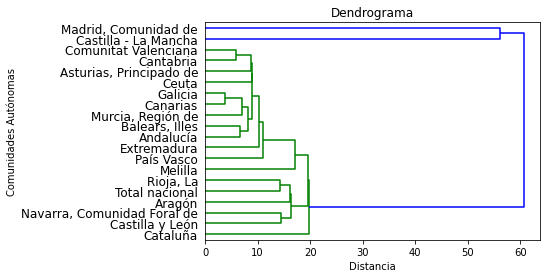

In [5]:
W = hierarchy.linkage(resultado, 'single')
dendrograma = sch.dendrogram(W,labels=np.array(comunidades),orientation='right')

plt.title('Dendrograma')
plt.xlabel('Distancia')
plt.ylabel('Comunidades Autónomas')
plt.show()


Vamos a realizar un corte en nuestro dendograma para ver cuantos cluster vamos a escoger. t es la altura donde queremos realizar el corte, en este caso lo haremos en 30. Para realizarlo utilizaremos la función axvline(), ya que queremos que la linea sea vertical, dado que hemos orientado el dendograma a la derecha. En caso de que quisiesemos una linea horizontal sería axhline().  

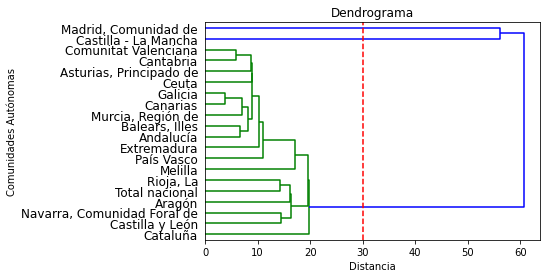

In [8]:
plt.title('Dendrograma')
plt.xlabel('Distancia')
plt.ylabel('Comunidades Autónomas')
dendrograma = sch.dendrogram(W,labels=np.array(comunidades), orientation='right')
plt.axvline(x=30, color='r', linestyle='--')
plt.show()

### **Matriz de distancias**
Para ver numéricamente la distancia entre nuestras variables (CCAA), realizamos la matriz de distancias, la cual nos muestra la distancia euclídea entre los puntos analizados, siendo una matriz *n x n*.

Inicialmente tenemos el vector con las distancias entre los datos analizados, a través de **pdist( )**. Posteriormente, **squareform( )** convierte el vector de distancia en una matriz de distancia. Por último, contruimos nuestra matriz. 

In [9]:
dist=pdist(resultado)  

DIST=squareform(dist) 

df=pd.DataFrame(DIST,index=comunidades,columns=comunidades) 
pd.set_option('precision',1)
df.head()

ccaa,Total nacional,Andalucía,Aragón,"Asturias, Principado de","Balears, Illes",Canarias,Cantabria,Castilla y León,Castilla - La Mancha,Cataluña,Comunitat Valenciana,Extremadura,Galicia,"Madrid, Comunidad de","Murcia, Región de","Navarra, Comunidad Foral de",País Vasco,"Rioja, La",Ceuta,Melilla
ccaa,,,,,,,,,,,,,,,,,,,,
Total nacional,0.0,60.4,30.1,51.5,60.5,69.1,46.5,30.3,105.9,45.3,51.0,34.9,67.2,162.1,68.4,16.3,25.9,14.3,44.4,55.4
Andalucía,60.4,0.0,45.3,9.0,6.7,14.7,18.7,89.3,166.3,105.7,12.9,25.5,16.3,222.4,9.6,76.4,35.3,49.7,17.3,22.9
Aragón,30.1,45.3,0.0,37.3,48.6,58.5,40.9,50.3,127.5,69.3,42.1,25.4,58.2,182.8,54.8,41.1,27.3,16.2,28.4,30.6
"Asturias, Principado de",51.5,9.0,37.3,0.0,11.3,21.2,13.2,80.4,157.3,96.8,8.8,16.5,21.3,213.4,17.9,67.4,26.6,40.8,8.9,20.4
"Balears, Illes",60.5,6.7,48.6,11.3,0.0,9.8,15.5,90.1,166.4,105.7,9.9,26.3,10.3,222.6,8.1,76.7,34.7,51.0,20.2,29.1


Una vez sabemos los cluster que vamos a utilizar, en nuestro caso 3, llamamos a la función AgglomerativeClustering(), le indicamos el númro de clusters, la métrica utilizada para relacionar las distancias, en este caso 'euclidean' y el método 'ward' como método general, que identifica los 2 clusters donde la suma de sus varianzas es menor, basandose en el valor óptimo de una función objetivo. 

Vamos a escalar nuestro DataFrame (resultado), para ello utilizaremos la función scale(). Además, llamamos a la función fit_predict para llevar a cabo nutro agrupamiento y así crear el array con la asignación de clusters. 

In [10]:
from sklearn.cluster import AgglomerativeClustering
clusters= AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
resultado_escalado = scale(resultado)
clusters.fit_predict(resultado_escalado)

array([0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2])

Dados los resultados haciendo la asignación con fit_predict(), podemos llamar a nuestro array clusters.labels_, nos saldrán los mismos resultados. Una vez tengamos esto, mostramos de forma gráfica a que clusters está asociada cada provincia. 

In [11]:
clusters.labels_

array([0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2])

In [13]:
clusters.labels_ccaa=pd.concat([comunidades,pd.DataFrame(clusters.labels_)],axis=1)
clusters.labels_ccaa.rename(columns={"ccaa":"Comunidades Autónomas",0:"Cluster"},inplace=True)
clusters.labels_ccaa

,Comunidades Autónomas,Cluster
0,Total nacional,0
1,Andalucía,0
2,Aragón,2
3,"Asturias, Principado de",0
4,"Balears, Illes",0
5,Canarias,0
6,Cantabria,0
7,Castilla y León,0
8,Castilla - La Mancha,1
9,Cataluña,0


Vamos a plasmar gráficamente la situación de los puntos en el plano. Lo primero que haremos será definir nuestra función, en este caso situación. Después, utilizaremos la función ax.text( ) para que salgan los nombres de las CCAA, así como ax.set_xlim y ax.set_ylim para decirles en que puntos se mueven nuestros ejes. Por último, fig.set_figheight( ) y fig.set_figwidth( ) nos proporcionan la altura y anchura de nuestro gráfico respectivamente. 


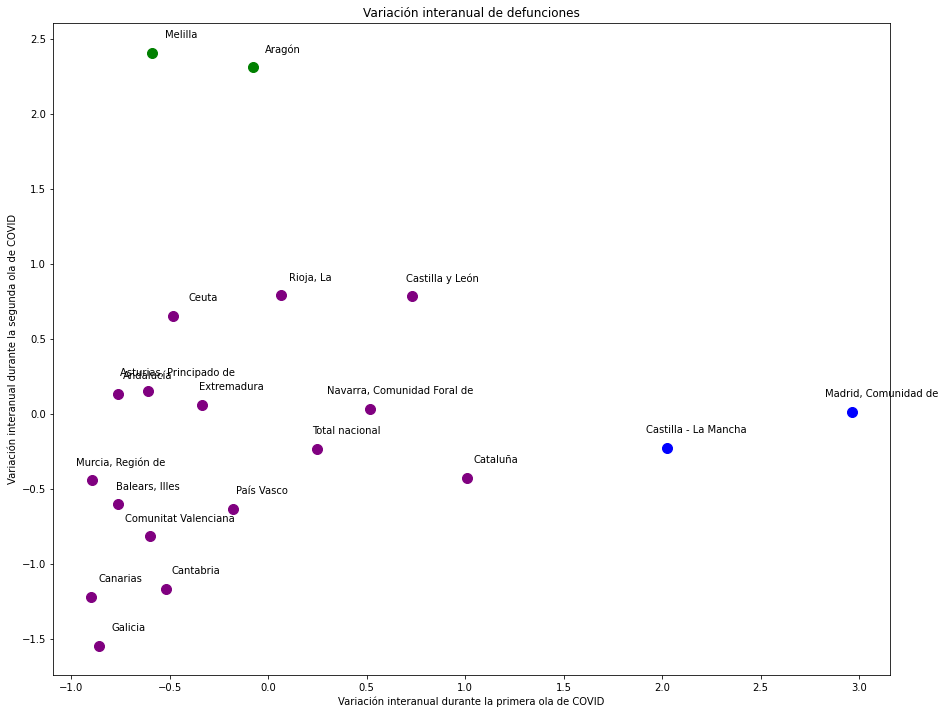

In [17]:
def situacion(x,y,z):
    fig, ax = plt.subplots()
    for i in range(20):       
      ax.text(x[i]+0.15,y[i]+0.12, z[i], color = 'black', ha = 'center', va = 'center') 
    ax.set_title('Variación interanual de defunciones')
    ax.set_xlabel('Variación interanual durante la primera ola de COVID')
    ax.set_ylabel('Variación interanual durante la segunda ola de COVID')
    fig.set_figheight(12)
    fig.set_figwidth(15)
    fig.show()
    plt.scatter(resultado_escalado[clusters.labels_==0,0],resultado_escalado[clusters.labels_==0,1],s=100, c='purple',label='Cluster1')
    plt.scatter(resultado_escalado[clusters.labels_==1,0],resultado_escalado[clusters.labels_==1,1],s=100, c='blue',label='Cluster2')
    plt.scatter(resultado_escalado[clusters.labels_==2,0],resultado_escalado[clusters.labels_==2,1],s=100, c='green',label='Cluster3')

situacion(resultado_escalado[:,0],resultado_escalado[:,1],comunidades)

A raiz de los resultados obtenidos se puede establecer que hay grandes diferencias entre los tres clusters. El cluster azul corresponde a las comunidades donde la primera ola de COVID generó un gran exceso de mortalidad respecto al año anterior, son los casos de la Comunidad de Madrid y Castilla-La Mancha. En cambio, el cluster verde corresponde a las comunidades donde se produjo un mayor exceso de fallecidos en la segunda ola, como son los casos de Melilla y Aragón. El cluster morado corresponde a las provincias donde hubo un exceso de fallecidos más parejo entre ambas olas, aunque podemos observar algunas diferencias entre algunas de ellas, por ejemplo, en Cataluña hubo un mayor exceso en la primera y en Ceuta hubo un mayor exceso en la segunda. 